In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install apyori

In [3]:
from apyori import apriori

In [4]:
dataset=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')


# Data Analysis

In [5]:
print(dataset.shape)
print(dataset.head(5))

(38765, 3)
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
dataset.size #total no of elements present in the dataset

116295

In [8]:
dataset.ndim #dimension (rep 2 axis,dataFrame )
#if dim<2 -->series
#if dim>2 -->panel
#if dim=2 -->dataFrame

2

In [9]:
dataset.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
dataset.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Q1: Which of the item is the top selling item?


In [11]:
dataset.itemDescription.value_counts().head(10) #to get top 10 selling items

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

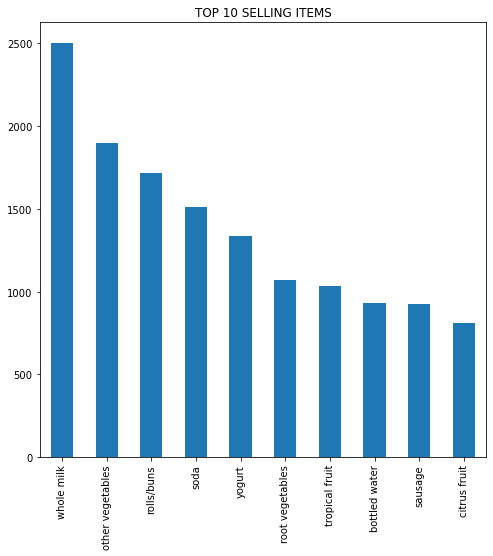

In [12]:
plt.figure(figsize=(8,8))
dataset.itemDescription.value_counts().head(10).plot.bar()
plt.title('TOP 10 SELLING ITEMS')
plt.show()

Q2: Which of the item is the least selling item?

In [13]:
dataset.itemDescription.value_counts().tail(10).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

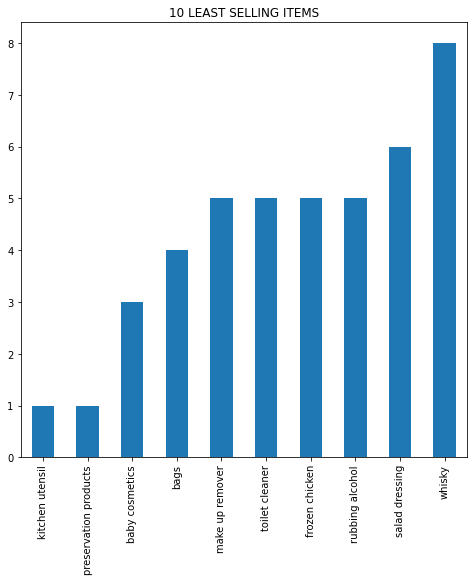

In [14]:
plt.figure(figsize=(8,8))
dataset.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('10 LEAST SELLING ITEMS')
plt.show()

Q3. Top 10 customers

In [15]:
dataset.Member_number.value_counts().head(10)

3180    36
3050    33
3737    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
4875    29
Name: Member_number, dtype: int64

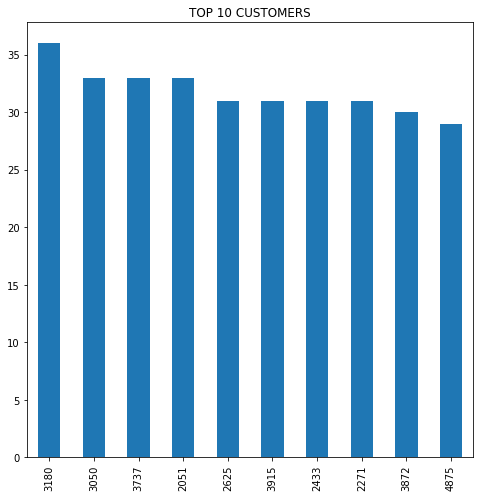

In [16]:
plt.figure(figsize=(8,8))
dataset.Member_number.value_counts().head(10).plot.bar()
plt.title('TOP 10 CUSTOMERS')
plt.show()

In [17]:
dataset.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


Q4. IN which year,the majority of the transactions has happened?

In [18]:
dataset['Year']=pd.DatetimeIndex(dataset['Date']).year
dataset['Month']=pd.DatetimeIndex(dataset['Date']).month
dataset['Day']=pd.DatetimeIndex(dataset['Date']).day

In [19]:
dataset.head(3)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19


In [20]:
dataset.Year.value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

In [21]:
dataset.Month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Month, dtype: int64

In [22]:
dataset.Day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
10    1308
4     1308
11    1297
24    1290
5     1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: Day, dtype: int64

In [23]:
dataset[dataset['Year']==2015]['Month'].value_counts()

8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: Month, dtype: int64

# Apriori Implementation

In [24]:
dataset.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [25]:
data=dataset.copy()
df=data.copy()

In [26]:
data=pd.get_dummies(data['itemDescription']) #since itemDescription has categorical values


In [27]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.drop('itemDescription',axis=1,inplace=True)

In [29]:
df=df.join(data)

In [30]:
df.head()

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
products=dataset['itemDescription'].unique()

In [32]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [33]:
df1=df.groupby(['Member_number','Date'])[products[:]].sum()
df1

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [34]:
df1=df1.reset_index()[products]
df1

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df1.values 

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [36]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [37]:
df1['tropical fruit']

0        0
1        0
2        0
3        0
4        0
        ..
14958    1
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: uint8

In [38]:
#only bought products(replacing 1 with colm name)
def func(data):
    for i in products:
        if data[i] > 0:
            data[i] = i
    return data
    

In [39]:
df1=df1.apply(func,axis=1)

In [40]:
df1.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df1.values

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [42]:
#removing zero
newdata=df1.values

In [43]:
newdata.ndim

2

In [44]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [45]:
'''for i in newdata:
    if i[i!=0].tolist():
        print(i[i!=0].tolist()) # where i !=0'''
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]        


        

In [46]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [47]:
dataset.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


# Apriori Implementation

In [48]:
association=apriori(newdata,
                    min_support=0.0003,
                    min_confidence=0.05,
                    min_lift=3,
                    max_length=2)

result=list(association)

In [49]:
result[0]  #liver loaf->fruit/vegetable juice

RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)])

In [50]:
#to get only itemset
for i in result[0]:
    print(i)

frozenset({'liver loaf', 'fruit/vegetable juice'})
0.00040098910646260775
[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]


In [51]:
type(result[0])

apyori.RelationRecord